In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
df_ = pd.read_csv("/content/AirlineTweets.csv")

In [5]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df = df_[['airline_sentiment', 'text']].copy()

In [7]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


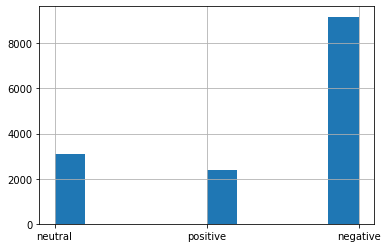

In [8]:
df['airline_sentiment'].hist()

In [9]:
target_map = {'positive':1, 'negative':0, 'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [11]:
df_train, df_test = train_test_split(df)

In [12]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [13]:
vectorizer = TfidfVectorizer(max_features=2000)

In [14]:
X_train = vectorizer.fit_transform(df_train['text'])

In [23]:
X_test = vectorizer.transform(df_test['text'])

In [24]:
Y_train = df_train['target']
Y_test = df_test['target']

In [25]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train Accuracy", model.score(X_train, Y_train))
print("Test Accuracy", model.score(X_test, Y_test))

Train Accuracy 0.8548269581056467
Test Accuracy 0.7991803278688525


In [26]:
pr_train = model.predict_proba(X_train)
pr_test = model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(Y_train, pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, pr_test, multi_class='ovo'))

Train AUC: 0.943094283974253
Test AUC: 0.8954010644982455


In [27]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

In [28]:
cm = confusion_matrix(Y_train, p_train, normalize='true')
cm

array([[0.96486133, 0.00813126, 0.02700741],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30150538, 0.0516129 , 0.64688172]])

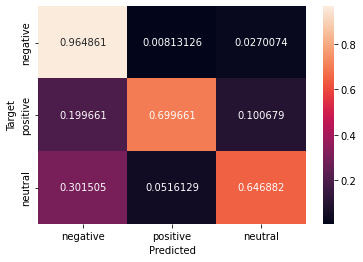

In [29]:
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

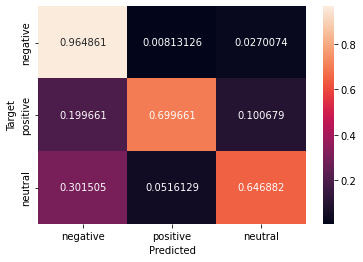

In [30]:
cm_test = confusion_matrix(Y_test, p_test, normalize='true')
plot_cm(cm)

In [31]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [32]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [33]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [34]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [35]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train Accuracy", model.score(X_train, Y_train))
print("Test Accuracy", model.score(X_test, Y_test))

Train Accuracy 0.9300982091276718
Test Accuracy 0.9147609147609148


In [36]:
pr_train = model.predict_proba(X_train)[:,1]
pr_test = model.predict_proba(X_test)[:,1]
print("Train AUC:", roc_auc_score(Y_train, pr_train))
print("Test AUC:", roc_auc_score(Y_test, pr_test))

Train AUC: 0.9790315809115082
Test AUC: 0.9533010061292087


In [37]:
model.coef_

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

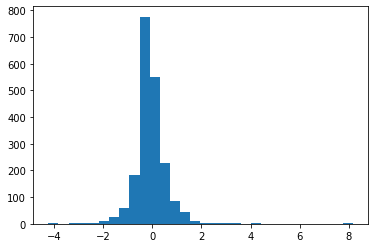

In [39]:
plt.hist(model.coef_[0], bins=30);

In [40]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1849,
 'change': 338,
 'made': 1087,
 'in': 938,
 'just': 989,
 'over': 1271,
 'hours': 903,
 'for': 745,
 'something': 1619,
 'that': 1737,
 'should': 1575,
 'have': 851,
 'taken': 1711,
 'online': 1246,
 'am': 139,
 'not': 1213,
 'loved': 1076,
 'the': 1739,
 'agent': 112,
 'though': 1755,
 'door': 568,
 'to': 1775,
 'half': 826,
 'into': 964,
 'plane': 1334,
 'seat': 1535,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1591,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1266,
 'of': 1227,
 'delayed': 497,
 'flights': 728,
 'you': 1993,
 'suck': 1682,
 'and': 148,
 'getting': 793,
 'worse': 1971,
 'fair': 670,
 'usairways': 1868,
 'stuck': 1677,
 'need': 1191,
 'reflight': 1438,
 'booking': 270,
 'problems': 1380,
 'next': 1199,
 'flight': 717,
 'possibly': 1359,
 'dm': 554,
 'more': 1166,
 'info': 951,
 'southwestair': 1630,
 'got': 810,
 'help': 867,
 'from': 765,
 'nice': 1201,
 'lady': 1007,
 'on': 1241,
 'phone': 1319,
 'thank': 1734,
 'refund': 1439,
 'vo

In [41]:
threshold = 2
print("Most positive words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > threshold:
    print(word, weight)

Most positive words:
southwestair 2.860075665459785
thank 8.07050397813353
great 5.20873389691305
best 3.63686428249652
virginamerica 3.228404796569231
thx 2.8083250880896204
jetblue 3.021616302052843
good 3.2615369142858572
thanks 8.157945495930262
love 4.40515271117904
appreciate 2.929926451296613
awesome 4.054714104329136
cool 2.08815193427802
kudos 2.6141836315400004
amazing 4.194647955698923
worries 2.711651303725899
wonderful 2.120412437475618


In [42]:
print("Most negative words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < -threshold:
    print(word, weight)

Most negative words:
hours -3.1801201728775474
not -4.23787116503946
delayed -2.704527096113025
hour -2.0696846300163347
but -2.2210484579962584
cancelled -2.6770621927482954
nothing -2.076824479976951
what -2.014376186168683
no -3.9708361704283863
worst -3.1900355097392574
hold -2.79023154069963
why -2.226987989493832
luggage -2.1625444978287147
